In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('preprocessed_ML.csv', low_memory=False) 
df

,Unnamed: 0,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0.0,mqtt.conack.flags-0,mqtt.conack.flags-0x00000000,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
0,71269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,64036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,146077,0.0,0.0,54043.0,56541.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,126868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0,0,1,0,0,1,0,0,1,0
4,145887,0.0,0.0,54070.0,49629.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152227,130171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
152228,50611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,...,0,0,0,0,0,0,0,0,0,0
152229,23852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.0,...,0,0,0,0,0,0,0,0,0,0
152230,126416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0,0,1,0,0,1,0,0,1,0


In [43]:
df['Attack_type'].value_counts()

Normal                   24125
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9552
Port_Scanning             8924
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152232 entries, 0 to 152231
Data columns (total 77 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Unnamed: 0                                                                         152232 non-null  int64  
 1   arp.opcode                                                                         152232 non-null  float64
 2   arp.hw.size                                                                        152232 non-null  float64
 3   icmp.checksum                                                                      152232 non-null  float64
 4   icmp.seq_le                                                                        152232 non-null  float64
 5   icmp.unused                                                                        152232 non

In [45]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['Unnamed: 0',
 'arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0.0',
 'http.request.method-0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-0.0',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2

In [46]:
len(feat_cols)

76

In [47]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [48]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [49]:
df[skip_list[3]].value_counts()

0.0    152232
Name: mqtt.msg_decoded_as, dtype: int64

In [50]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['Unnamed: 0',
 'arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0.0',
 'http.request.method-0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-0.0',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'http.referer-0',
 'http.referer-127.0.0.1'

# Rest of visualization will be on test set
### because it takes much time on the whole dataset

In [51]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [53]:
# plt.figure(figsize=(20,200))
# tmp_df = X_train.copy()
#tmp_df[label_col] = y_train
#tmp_df = X_test.copy()
#tmp_df[label_col] = y_test
#sns.pairplot(data=tmp_df, hue=label_col, palette="Pastel2")

#del tmp_df

In [54]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [55]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [56]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X_feat, y_label):
    mi_scores = mutual_info_regression(X_feat, y_label, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_feat.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#mi_scores = make_mi_scores(X_train, y_train)
#mi_scores = make_mi_scores(X_test, y_test)

In [57]:
def plot_utility_scores(scores):
    y_scores = scores.sort_values(ascending=True)
    width = np.arange(len(y_scores))
    ticks = list(y_scores.index)
    plt.barh(width, y_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


#plt.figure(dpi=100, figsize=(50, 50))
#plt.xlabel("Score")
#plt.ylabel("Feature")
#plot_utility_scores(mi_scores)

In [58]:
from sklearn.manifold import TSNE
import time

In [59]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=10)
#tsne_results = tsne.fit_transform(X_train)
#tsne_results = tsne.fit_transform(X_test)
print('t-SNE: {} seconds'.format(time.time()-time_start))

t-SNE: 9.584426879882812e-05 seconds


In [60]:
# TSNE_df = pd.DataFrame.from_dict({
#   "tsne-2d-one": tsne_results[:,0],
#   "tsne-2d-two": tsne_results[:,1],
#    #"y":y_train 
#   "y":y_test
# })

In [61]:
# plt.figure(figsize=(20,20))
# sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
#                 hue=label_col,
#                 data=TSNE_df,
#                 legend="full",
#                 alpha=0.8)

# del TSNE_df

In [62]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.0287633046122655,
 1: 0.967008099094807,
 2: 0.7749355731602559,
 3: 0.9903635032934862,
 4: 0.7000344887049491,
 5: 11.904692082111437,
 6: 28.388111888111887,
 7: 0.4206735751295337,
 8: 1.0176736024066182,
 9: 1.1372741280291356,
 10: 1.0474777448071217,
 11: 0.987112462006079,
 12: 0.9936360298617061,
 13: 1.0085714285714287,
 14: 1.0624182151269301}

In [63]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [64]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [65]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
input_shape = X_train.shape[1:]

In [67]:
print(X_train.shape, X_test.shape)
print(input_shape)

(121785, 72, 1) (30447, 72, 1)
(72, 1)


In [68]:
num_classes = len(np.unique(y_train))
num_classes

15

In [69]:
from  tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

In [70]:
print(y_train.shape, y_test.shape)

(121785, 15) (30447, 15)


In [71]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

In [72]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [73]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn

def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [74]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
print(y_train.shape)

(121785, 15)


In [76]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])

In [78]:
print(X_train.shape
)

(121785, 72)


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
hist2 = rfc.fit(X_train, y_train)

# Validation Results

In [81]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [82]:
y_hat = rfc.predict(X_test)

In [83]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

In [84]:
y_true_ohe = to_categorical(y_true, num_classes=num_classes)
y_hat_ohe =  to_categorical(y_hat, num_classes=num_classes)

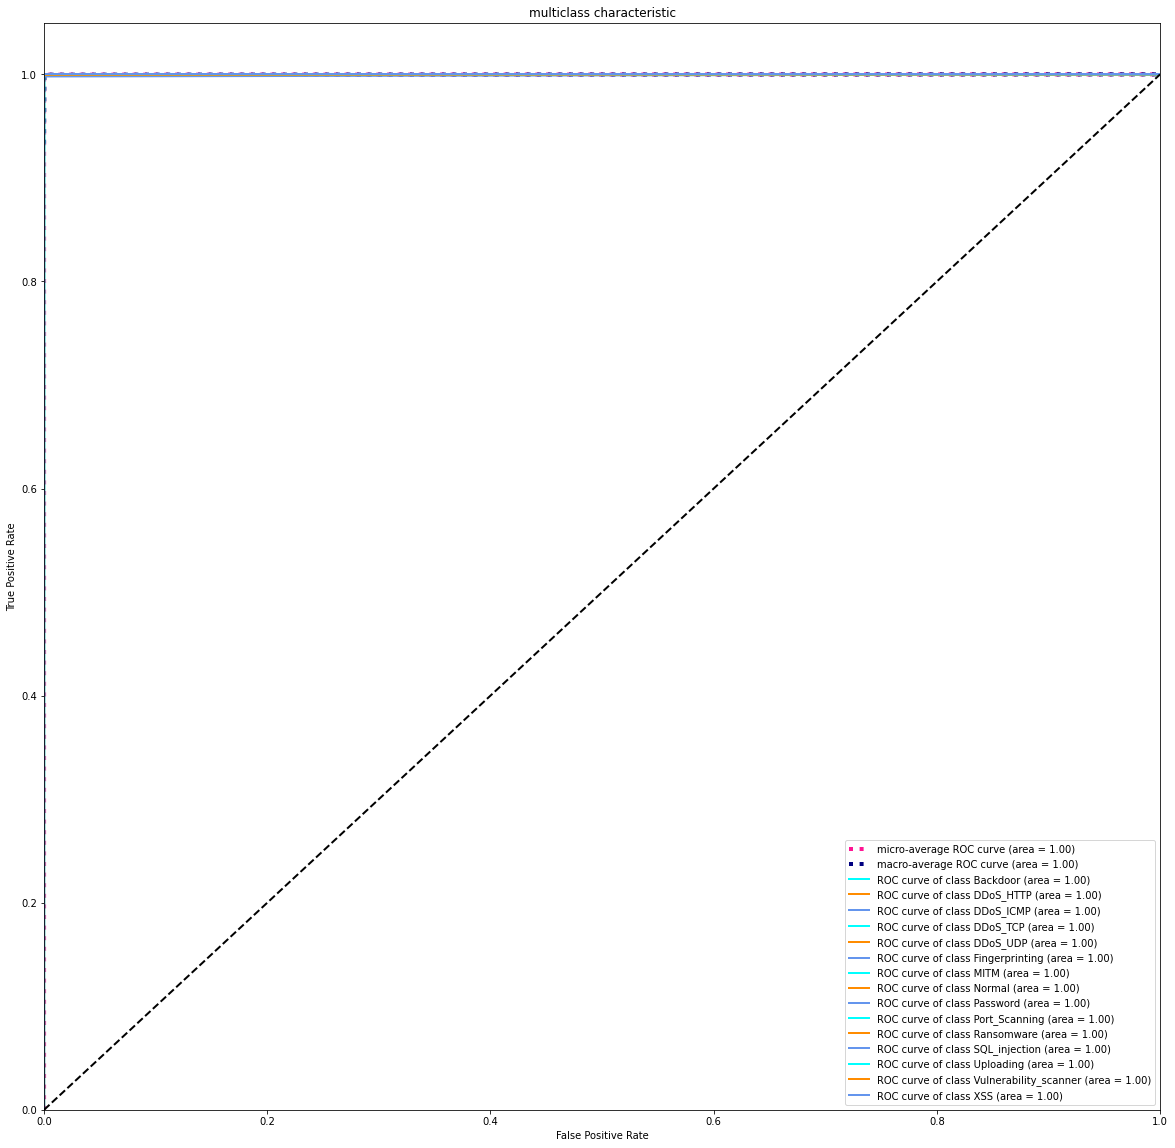

In [85]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, num_classes)

Accuracy:  0.9997044043748152
Precision::  0.9997044043748152
Recall::  0.9997044043748152
F1_Score::  0.9997044043748152

Macro precision_recall_fscore_support (macro) average
(0.9996972754793139, 0.9996989800993595, 0.9996976951452441, None)

Macro precision_recall_fscore_support (micro) average
(0.9997044043748152, 0.9997044043748152, 0.9997044043748152, None)

Macro precision_recall_fscore_support (weighted) average
(0.9997057466354744, 0.9997044043748152, 0.9997046541430032, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      1973
            DDoS_HTTP       1.00      1.00      1.00      2099
            DDoS_ICMP       1.00      1.00      1.00      2619
             DDoS_TCP       1.00      1.00      1.00      2049
             DDoS_UDP       1.00      1.00      1.00      2900
       Fingerprinting       1.00      1.00      1.00       171
                 MITM     

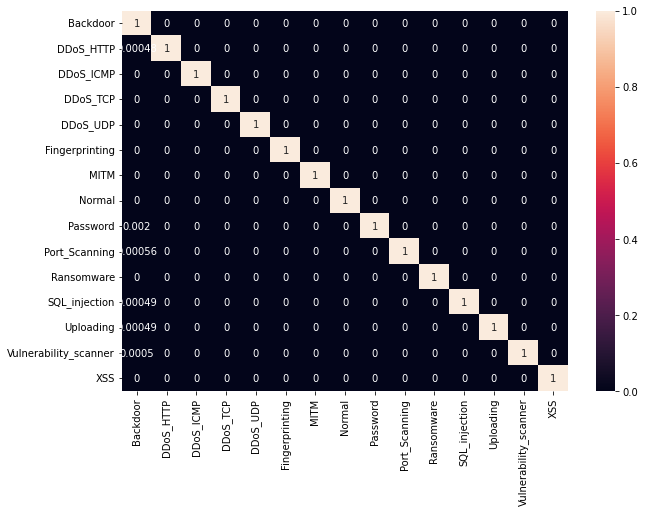

In [86]:
print_score(y_hat, y_true, label_encoder)